# Принятие решений в бизнесе.

<u>**Цель: Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты**</u>

**Описание данных.**

**Файл "Гипотезы":**
- `Hypothesis` - краткое описание гипотезы;
- `Reach` - охват пользователей по 10-балльной шкале;
- `Impact` -  влияние на пользователей по 10-балльной шкале;
- `Confidence` - уверенность в гипотезе по 10-балльной шкале;
- `Efforts` - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл "Заказы":**
- `transactionId` -  идентификатор заказа;
- `visitorId` - идентификатор пользователя, совершившего заказ;
- `date` - дата, когда был совершён заказ;
- `revenue` -  выручка заказа;
- `group` -  группа A/B-теста, в которую попал заказ.

**Файл "Посетители":**
- `date` - дата;
- `group` - группа A/B-теста;
- `visitors` - количество пользователей в указанную дату в указанной группе A/B-теста.

**План работы.**
- провести предобработку данных;
- провести приоритизицию гипотез;
- Провести анализ А/В-теста;
- Сделать выводы и дать рекомендации.

##  Загрузка данных и подготовка к анализу.

###  Подключаем библиотеки и открываем датафреймы

In [1]:
#подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from scipy import stats as st

In [2]:
#открываем файлы
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv', parse_dates=['date'], dayfirst=True)
    visitors = pd.read_csv('/datasets/visitors.csv', parse_dates=['date'], dayfirst=True)
except:
    hypothesis = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\Принятие решений в бизнесе\\hypothesis.csv')
    orders = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\Принятие решений в бизнесе\\orders.csv',
                        parse_dates=['date'], dayfirst=True)
    visitors = pd.read_csv('C:\\Users\\ignat\\OneDrive\\Рабочий стол\\Аналитик Практикум\\Принятие решений в бизнесе\\visitors.csv',
                       parse_dates=['date'], dayfirst=True)

###  Выгружаем первые строки и информацию о датафреймах.

Для облегчения кода создадим фунцию для просмотра информации.

In [3]:
def summary(dataset):
    '''
    Выводит первые строки датасета и информацию о нём
    '''
    display(dataset.head(10))
    print('*'*50)
    dataset.info()
    print('*'*50)
    display(dataset.isna().sum())

In [4]:
#гипотезы. Информация
summary(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
**************************************************


Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [5]:
#заказы. Информация
summary(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
**************************************************


transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [6]:
#посетители. Информация
summary(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
**************************************************


date        0
group       0
visitors    0
dtype: int64

**Вывод:** Для проведения работы предоставлено 3 файла. Файл с гипотезами содержит 9 строк и 9 гипотез соответственно. Файл "orders" содержит информацию о заказах, а файл "visitors" суммарное количество посетителей на каждую дату. Формат даты преобразовался корректно во время выгрузки там, где это необходимо. Остальные форматы данных правильные и в исправлении не нуждаются. Пропусков в данных нет. Стоит преобразовать имена столбцов к общепринятому змеиному стилю. Также необходимо определить временные рамки проводимого эксперимента и проверить наличие дубликатов.

In [7]:
#приводим названия к нижнему регистру и змеиному виду
hypothesis.columns = hypothesis.columns.str.lower()
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

Проверим, что всё прошло корректно, данные не пострадали и пропуски не появились.

In [8]:
#гипотезы. Информация
summary(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
**************************************************


hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

In [9]:
#заказы. Информация
summary(orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
**************************************************


transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

###  Проверка на наличие дубликатов и определение границ эксперимента.

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

In [12]:
display (orders['date'].min())
orders['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

In [13]:
display (visitors['date'].min())
visitors['date'].max()

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

**Вывод:** явных дубликатов не обнаружено. Данные о покупках предоставлены за август 2019 года.

##   Приоритизация гипотез.

###  Применение фреймворка ICE

In [14]:
#считаем ICE по формуле
pd.set_option('display.max_colwidth', 150) #строка для отображения информации целиком

hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.background_gradient(subset=['ICE'], cmap='Blues')

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


**Вывод:** при выборе приоритетной гипотезы методом ICE, первое место занимает гипотеза номер 8: "Запустить акцию, дающую скидку на товар в день рождения". Далее расставим приоритеты методом RICE.

###  Применение фреймворка RICE

In [15]:
#считаем RICE по формуле

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).style.background_gradient(subset=['RICE'], cmap='Blues')

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000000


**Вывод:** при выборе приоритетной гипотезы методом RICE, первое место занимает гипотеза номер 7: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Как видно, при данном методе приоритизации на первое место вышла гипотеза, которая при оценке методом ICE была только на 3 месте, а приоритетная гипотеза по методу ICE при оценке методом RICE оказалась лишь на 5 месте. Для того, чтобы понять, почему так произошло, посмотрим еще раз на таблицу целиком.

In [16]:
pd.reset_option('display.max_colwidth', 150) #сброс настройки полного отображения
hypothesis.style.background_gradient(subset=['RICE', 'ICE'], cmap='Blues')

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.200000


**Вывод:** единственным отличием оценки RICE от ICE является наличие значения rich в числителе, то есть помимо влияния и увереннности в успехе добавляется параметр "охват" - количество пользователей, которых затронет эксперимент. Как видно, гипотеза номер 8 имеет минимальную оценку rich - 1, а вот гипотеза номер 7 напротив имеет максимальное значение rich - 10, то есть проведение данного эксперимента затронет значительно больше пользователей, поэтому при оценке методом RICE она и занимает лидирующую строчку. В то же время стоит отметить, что параметры влияния и увернности у 8 гипотезы всё таки выше, а усилия равны с 7 гипотезой. Окончательный выбор проверяемой гипотезы предстоит сделать руководителю проекта.

##  Анализ A/B-теста.

### Проверка распределения клиентов по группам.

In [17]:
#общее количество заказов
len(orders)

1197

In [18]:
#заказы группы А
len(orders.query('group == "A"'))

557

In [19]:
#заказы группы B
len(orders.query('group == "B"'))

640

**Вывод:** итого совершено 1197 заказов. На группу А приходится 557, на группу В - 640. Проверим, сколько пользователей попало в каждую из групп.

In [20]:
#гуппировка по уникальным пользователям
users = orders.groupby('visitor_id').agg({'group': ['nunique', 'unique']})
users.columns = ['count_groups', 'group']
display(users.head())
len(users)

,count_groups,group
visitor_id,,
5114589,1,[B]
6958315,1,[B]
8300375,2,"[B, A]"
11685486,1,[A]
39475350,1,[B]


1031

**Вывод:** общее количество уникальных покупателей равно 1031, то есть большинство покупателей совершили только одну покупку. В глаза бросается факт, что присутствуют клиенты, которые по тем или иным причинам попали одновременно в две группы. Проверим их количество.

In [21]:
#выявление покупателей, попавших в обе группы
users = users.query('count_groups == 2')
display(users.head())
len(users)

,count_groups,group
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


58

**Вывод:** из 1031 уникальных покупателей 58 совершили минимум 2 покупки и попали в разные группы исследования. Это порядка 5% от общего количества покупателей. Данный факт является грубой ошибкой при проведении теста и искажает результаты.  Определить группу посетителей, которые не совершили покупку и также находятся в разных группах исследования одновременно, не представляется возможным, так как их `visitor_id` не записаны в файле `visits`. В связи с этим, для подсчета среднего чека и кумулятивной выручки данные этих покупателей учитывать не будем. А для расчета конверсии оставим эти данные без изменений, так как рискуем сильно исказить результаты. Выделим индексы данных пользователей для последующей фильтрации.

In [22]:
users_index = users.index
users_index

Int64Index([   8300375,  199603092,  232979603,  237748145,  276558944,
             351125977,  393266494,  457167155,  471551937,  477780734,
             818047933,  963407295, 1230306981, 1294878855, 1316129916,
            1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
            1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
            2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
            2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
            2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
            3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
            3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
            3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
            4186807279, 4256040402, 4266935830],
           dtype='int64', name='visitor_id')

In [23]:
#оставляем данные без "плохих" покупателей
orders_clear = orders[~orders['visitor_id'].isin(users_index)]
summary(orders_clear)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B
10,3649131742,879864040,2019-08-15,4008,A


**************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB
**************************************************


transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

Данные отфильтровались корректно, приступаем к анализу.

### График кумулятивной выручки по группам.

Для построения графиков необходимо создать таблицу с кумулятивными данными.

In [24]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders_clear[np.logical_and(orders_clear['date'] <= x['date'], orders_clear['group'] == x['group'], )].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


Разделим датафрейм на 2 части по группам А и В.

In [25]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

display(cumulativeRevenueA.head())

cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


,date,revenue,orders
0,2019-08-01,142779,23
2,2019-08-02,234381,42
4,2019-08-03,346854,66
6,2019-08-04,388030,77
8,2019-08-05,474413,99


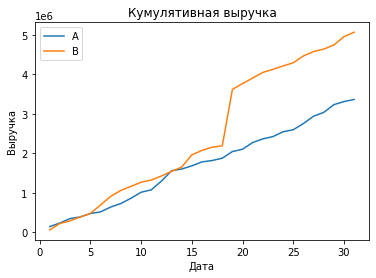

In [26]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'].dt.day, cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'].dt.day, cumulativeRevenueB['revenue'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка')
plt.legend()
plt.show()

**Вывод:** В начале эксперимента линии идут вровень. После 5 дня группа В вырывается в лидеры и набирает общую выручку быстрее. На 13 день графики вновь пересекаются, то есть показывают одинаковое значение накопленной выручки. Потом группа В снова выходит в лидеры, а на 18-19 день эксперимента происходит резкий всплеск выручки у группы В, в то время как группа А сохраняет стабильность. Вероятно, имеет место разовая крупная покупка, которая сильно повлияла на график, так как после этого всплеска графики идут параллельно, то есть набирают выручку примерно одинаково. Необходимо построить график кумулятивного среднего чека, на нем выброс из-за крупной покупки будет видно.

### График кумулятивного среднего чека по группам.

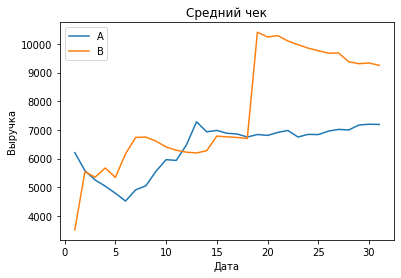

In [27]:
plt.plot(cumulativeRevenueA['date'].dt.day, cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'].dt.day, cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Средний чек')
plt.legend()
plt.show()

**Вывод:** Средний чек по группе А имеет просадку в начале эксперимента, затем достаточно быстро растет и после 2 недель эксперимента выравнивается на уровне 7000. Группа В напротив постепенно увеличивает средний чек первую неделю эксперимента, потом начинает выравниваться, но ближе к 20 дню виден скачок с 7000 до 10000, это однозначно говорит о крупной покупке или нескольких крупных покупках, которые выбиваются из общей массы. Далее линия среднего чека начинает снижаться, возвращаясь к среднему значению. Построим график относительного изменения среднего чека для оценки стабильности данных.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

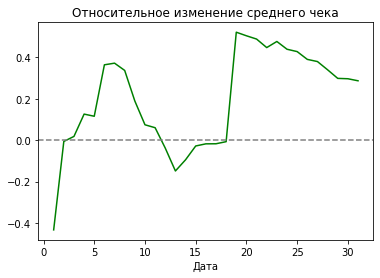

In [28]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', 
                                                   right_on='date', 
                                                   how='left', 
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'].dt.day, 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color='green')

# добавляем ось X
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel('Дата')
plt.title('Относительное изменение среднего чека')
plt.show()

**Вывод:** отношение средних чеков нестабильно на протяжении всего эксперимента. Колебания достаточно серьёзные: от -20% до +50%. В середине эксперимента видна просадка среднего чека группы В, а потом следует резкий всплеск, в те же даты, что были отмечены ранее. Это также свидетельствует о наличии выбросов. Тем не менее, средний чек группы В на большем протяжении времени выше среднего чека группы А.

###  График кумулятивного среднего количества заказов на посетителя по группам.

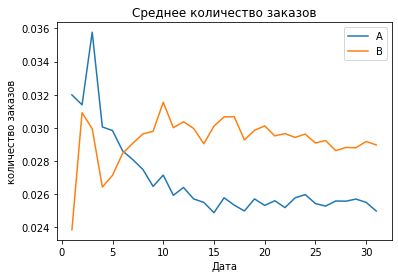

In [29]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'].dt.day, cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'].dt.day, cumulativeDataB['conversion'], label='B')

plt.xlabel('Дата')
plt.ylabel('количество заказов')
plt.title('Среднее количество заказов')
plt.legend()
plt.show()

**Вывод:** среднее количество заказов по группам стабилизируется к концу второй недели экспермента. У группы В количество заказов в среднем выше, чем у группы А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

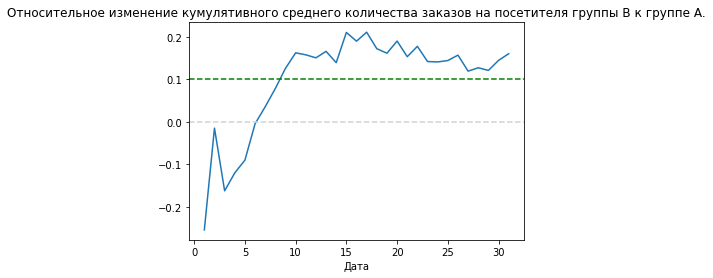

In [30]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'].dt.day, mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)


plt.axhline(y=0, color='lightgray', linestyle='--')
plt.axhline(y=0.1, color='green', linestyle='--')

plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A.')
plt.show()

**Вывод:** в начале теста отношение колеблется, но уже с 3 дня среднее количество заказов группы В стремительно растет, пока не упирается в потолок 20%, затем идет постеменное снижение. По графику пока нельзя сказать, что отношение среднего количества заказов стабилизировалось, но то, что среднее количество заказов группы В на протяжении 3 последнизх недель выше - неоспоримый факт! Количество заказов у группы В больше, соответственно и конверсия выше.

### Точечный график количества заказов по пользователям.

Для этого необходимо определить количество покупок на каждого покупателя. Сгруппируем таблицу с заказами по покупателям, посчитаем количество заказов на каждого конкретного.

In [31]:
#группируем по пользователям
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'count', 'group': 'max'})
ordersByUsers.columns = ['visitor_id', 'orders', 'group']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders,group
1023,4256040402,11,B
591,2458001652,11,B
569,2378935119,9,B
487,2038680547,8,B
44,199603092,5,B
744,3062433592,5,B
55,237748145,5,B
917,3803269165,5,B
299,1230306981,5,B
897,3717692402,5,B


**Вывод:** по таблице видно, что есть покупатели, которые совершили более 5 покупок, но их всего 4 человека. Дальше максимальное количество заказов составляет 5. Построим точечный график, чтобы наглядно увидеть, как вообще распределено количество заказов на одного покупателя. Попробуем исключить "плохих" пользователей, попавших сразу в обе группы.

In [32]:
#группируем по пользователям
ordersByUsersClear = orders_clear.groupby('visitor_id', as_index=False).agg({'transaction_id': 'count', 'group': 'max'})
ordersByUsersClear.columns = ['visitor_id', 'orders', 'group']
ordersByUsersClear.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders,group
908,3967698036,3,A
55,249864742,3,B
478,2108163459,3,A
687,2988190573,3,A
890,3908431265,3,A
138,611059232,3,A
632,2742574263,3,B
157,678354126,2,A
323,1404560065,2,B
452,1985475298,2,B


**Вывод:** без учета "плохих" пользователей картина намного ровнее - не более 3 покупок на человека. При из выявлении приняли решение считать количество заказов с их учетом, поэтому пока их не удаляем. В любом случае, они в большинстве случаев окажутся выбросами и в конечном итоге отсеятся.

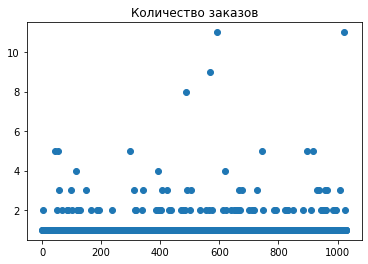

In [33]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов')
plt.show()

In [34]:
ordersByUsers['orders'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: orders, dtype: float64

**Вывод:** видим, что основная часть покупателей имеет только 1 заказ, еще немного по 2 заказа, а далее следует пропасть в количестве. Стоит отметить, что в топ-10 из таблицы попали исключительно пользователи из группы В. Возможно, пользователи из группы А ведут себя иначе? Стоит разделить количество покупок на группы и сравнить.

In [35]:
#разделяем пользователей на группы
ordersByUsersA = ordersByUsers[ordersByUsers['group'] == 'A']
ordersByUsersB = ordersByUsers[ordersByUsers['group'] == 'B']

display(ordersByUsersA.sort_values(by='orders', ascending=False).head())
ordersByUsersB.sort_values(by='orders', ascending=False).head()

,visitor_id,orders,group
148,611059232,3,A
504,2108163459,3,A
726,2988190573,3,A
937,3908431265,3,A
959,3967698036,3,A


,visitor_id,orders,group
1023,4256040402,11,B
591,2458001652,11,B
569,2378935119,9,B
487,2038680547,8,B
897,3717692402,5,B


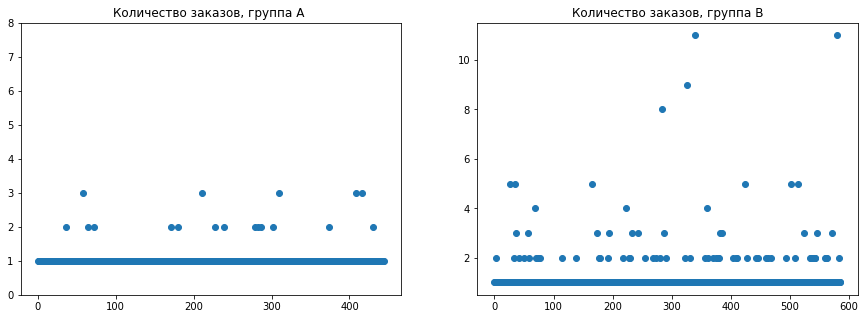

In [36]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(ordersByUsersA)))
plt.scatter(x_values, ordersByUsersA['orders']) 
plt.title("Количество заказов, группа А ")
plt.ylim(0,8)

plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(ordersByUsersB)))
plt.scatter(x_values, ordersByUsersB['orders'] ) 
plt.title("Количество заказов, группа В")
plt.show()

**Вывод:** действительно, в группе А нет таких выбросов по количеству покупок, ни один из покупателей не совершил более 3 покупок за месяц, в группе В выбросов больше. Вспоминаем графики из начала исследования - там тоже явно были выбросы, теория начинает подтверждаться. Далее следует выявить 95 и 99 процентили, чтобы понять, какое количество данных нужно отбросить, чтобы получить более достоверный результат.

### 95-й и 99-й перцентили количества заказов на пользователя.

In [37]:
#все покупатели 
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

In [38]:
#все покупатели без учета "плохих"
np.percentile(ordersByUsersClear['orders'], [95, 99])

array([1., 2.])

In [39]:
#Группа А
np.percentile(ordersByUsersA['orders'], [95, 99])

array([1.  , 2.56])

In [40]:
#Группа В
np.percentile(ordersByUsersB['orders'], [95, 99])

array([2., 5.])

**Вывод:** в группе А не более 5% покупателей сделали более 1 заказа, а до 3 заказов дошли лишь единицы. В группе В 5% покупателей зделали уже не более 2 заказов, а 1% совершили 5 и более покупок. Выходит, что в группе В среднее количество покупок выше. В среднем, без разбивки по группам, не более 5% пркупателей совершили 2 заказа. Получается, из группы А следует убрать данные о пользователях, совершивших более 1 заказа, для группы В - более 2 заказов. Если взять общее количество заказов за вычетом "плохих" получаем значение, близкое в группе А: 1 на 95-м и 2 на 99-м перцентиле. Можно оставить границу на 1 заказе, но тогда потеряем данные для анализа, пожтому оставляем, как решено ранее.

###  Точечный график стоимостей заказов.

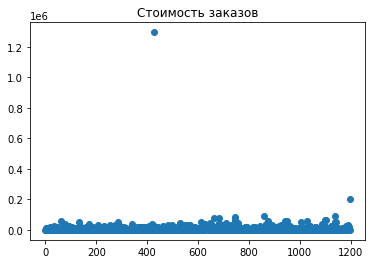

In [41]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.show()

In [42]:
orders['revenue'].describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Похоже, вот и виновник резкого всплеска - одиноко светится значительно выше всех остальных. Из-за единичного выброса ничего рассмотреть не получается. Ограничим отображение по сумме.

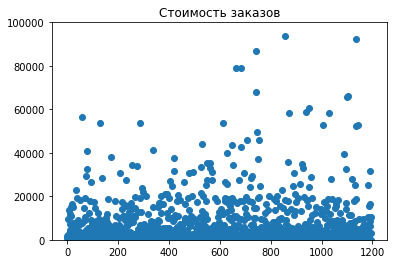

In [43]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.ylim(0, 100000)
plt.show()

Рассмотрим также поведение покупателей по каждой группе отдельно.

In [44]:
#делим заказы по группам
ordersA = orders_clear[orders_clear['group'] == 'A']
ordersB = orders_clear[orders_clear['group'] == 'B']

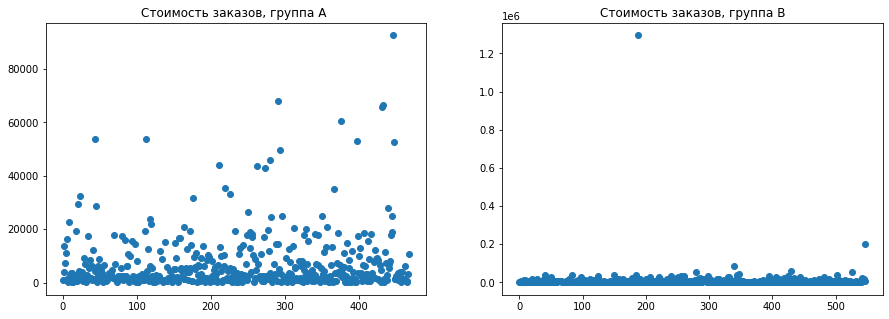

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(ordersA)))
plt.scatter(x_values, ordersA['revenue']) 
plt.title("Стоимость заказов, группа А ")


plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(ordersB)))
plt.scatter(x_values, ordersB['revenue'] ) 
plt.title("Стоимость заказов, группа В")
plt.show()

**Вывод:** видно, что выброс пришелся на группу В. Из-за масштаба сложно оценить распределение по стоимость заказов. Также ограничим отображение по группе В.

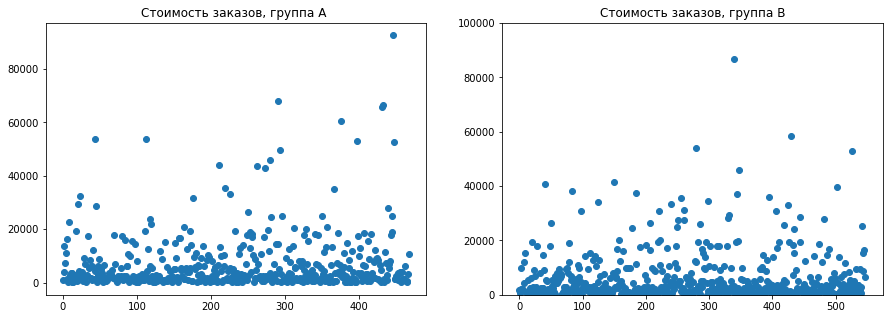

In [46]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
x_values = pd.Series(range(0,len(ordersA)))
plt.scatter(x_values, ordersA['revenue']) 
plt.title("Стоимость заказов, группа А ")


plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(ordersB)))
plt.scatter(x_values, ordersB['revenue'] ) 
plt.title("Стоимость заказов, группа В")
plt.ylim(0, 100000)
plt.show()

**Вывод:** визуально большая часть заказов находится в пределах 20000. Если не считать единичных выбросов у группы В, то можно сказать, что средняя стоимость заказазов у обеих групп одинаковая. Для более точного определения необходимо также, как и в случае с количеством заказов, посчитать 95-й и 99-й перцентили.

###  95-й и 99-й перцентили стоимости заказов.

In [47]:
np.percentile(orders_clear['revenue'], [95, 99])

array([26785., 53904.])

In [48]:
np.percentile(ordersA['revenue'], [95, 99])

array([24944.5 , 56064.18])

In [49]:
np.percentile(ordersB['revenue'], [95, 99])

array([27561.5, 49553.6])

**Вывод:** как и предполагалось, 95-й и 99-й перцентили по обеим не равны.  95-й перцентиль группы А меньше,чем у группы В, а с 95-м перцентилем всё наоборот. Это говорит о большей плотности стоимости заказов у группы В. За верхнюю границу предлагаю взять значение 27000 для обеих групп, таким образом мы равномерно "обрежем" аномальные данные по группам.

###   Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы:
- H0: различий в среднем количестве заказов между группами нет. 
- H1: различия в среднем между группами есть.

Начнем с подготовки данных

Названия столбцов данных:
- `date` - дата;
- `ordersPerDateA` -  количество заказов в выбранную дату в группе A;
- `revenuePerDateA` - суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` -  количество заказов в выбранную дату в группе B;
- `revenuePerDateB` -  суммарная выручка в выбранную дату в группе B;
- `ordersCummulativeA` - суммарное число заказов до выбранной даты включительно в группе A;
- `revenueCummulativeA` - суммарная выручка до выбранной даты включительно в группе A;
- `ordersCummulativeB` - суммарное количество заказов до выбранной даты включительно в группе B;
- `revenueCummulativeB` - суммарная выручка до выбранной даты включительно в группе B;
- `visitorsPerDateA` - количество пользователей в выбранную дату в группе A;
- `visitorsPerDateВ` - количество пользователей в выбранную дату в группе В;
- `visitorsCummulativeA` - количество пользователей до выбранной даты включительно в группе A;
- `visitorsCummulativeВ` - количество пользователей до выбранной даты включительно в группе В;

Создадим переменные `ordersByUsersA` и `ordersByUsersB` со столбцами `visitor_id', 'orders'`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [51]:
# Создаем DataFrame с количеством заказов на пользователя в группе A
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

# Аналогично создаем DataFrame с количеством заказов на пользователя в группе B
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

# Создаем выборки sampleA и sampleB для проведения статистических тестов
sampleA = pd.concat([ordersByUsersA['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),
            name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
        pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),
            name='orders')],axis=0)

Используем критерий Манна-Уитни для проверки гипотезы.

In [52]:
print('p-value:', f'{st.mannwhitneyu(sampleA, sampleB)[1]:.3f}')
print(f'{(sampleB.mean() / sampleA.mean() - 1):.3f}')

p-value: 0.017
0.138


**Вывод:** p-value показывает результат ниже статистической значимости. Это означает, что мы отвергаем нулевую гипотезу. Судя по всему,различия в группах всё же имеются. Отностительная разница конверсии по группам составила 13,8%, конверсия в группе В выше. Это информация по "сырым" данным.

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

Сформулируем гипотезы:
- H0: статистически значимых различий в среднем чеке между группами нет. 
- H1: статистически значимые различия в среднем чеке есть.

In [53]:
print('p-value:', f'{st.mannwhitneyu(orders_clear[orders_clear["group"]=="A"]["revenue"], orders_clear[orders_clear["group"]=="B"]["revenue"])[1]:.3f}')
print(f'{orders_clear[orders_clear["group"]=="B"]["revenue"].mean()/orders_clear[orders_clear["group"]=="A"]["revenue"].mean()-1:.3f}')

p-value: 0.829
0.287


**Вывод:** исходя из "сырых" данных получается следующая картина: p-value значительно превышает уровень статистической значимости, соответственно мы не можем отвергнуть нулевую гипотезу о равенстве среднего. Относительная разница среднего чека между группами составляет почти 29%, однако в данном случае это значение не является статистически значимым, поскольку могло получиться в результате воздействия единичных выбросов. Напомню, в исследовании попался чек, превышающий средние значения более чем в 40 раз! В связи с эти далее исследуем очищенные данные и заново сравним среднее количество заказов и статистические различия в среднем чеке.

###  Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Найдем переменную, в которой соберем аномальные значения по количеству заказов и по среднему чеку. Данные возьмем из предыдущих пунктов.

In [54]:
#пользователи с большим количеством заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)

#пользователи с дорогими покупками
revenue_lim = 27000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']

#сводная по аномальным пользователям
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.shape[0]

94

Получили 94 покупки, которые выбиваются за "нормальные" границы по количеству заказов и по среднему чеку. Можно приступать к проверке гипотез по "очищенным" данным.

In [55]:
#данные по группе А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#данные по группе В
sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Проверяем гипотезы тем же методом. вспомним формалировку:
- H0: различий в среднем количестве заказов между группами нет. 
- H1: различия в среднем между группами есть.

В первом случае результаты были такими:
- p-value; 0,017
- 0,138

In [56]:
print('p-value:', f'{st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]:.5f}')
print(f'{sampleBFiltered.mean() / sampleAFiltered.mean() - 1:.3f}')

p-value: 0.00485
0.242


**Вывод:**  значение p-value стало еще меньше, мы с еще большей уверенностью можем отвергнуть нулевую гипотезу о равенстве среднего количества заказов. Более того, значение относительной конверсии еще больше склонилось в сторону группы В и составило более 24%

###  Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Проверяем гипотезы тем же методом. вспомним формулировку:
- H0: статистически значимых различий в среднем чеке между группами нет. 
- H1: статистически значимые различия в среднем чеке есть.

В первом случае результаты были такими:
- p-value; 0,29
- 0,287

In [57]:
print(
    f'{st.mannwhitneyu(orders[np.logical_and(orders["group"] == "A", ~orders["visitor_id"].isin(abnormalUsers))]["revenue"], orders[np.logical_and(orders["group"] == "B", ~orders["visitor_id"].isin(abnormalUsers))]["revenue"])[1]:.3f}'
)

print(
    f'{orders[np.logical_and(orders["group"] == "B", ~orders["visitor_id"].isin(abnormalUsers))]["revenue"].mean() / orders[np.logical_and(orders["group"] == "A", ~orders["visitor_id"].isin(abnormalUsers))]["revenue"].mean() - 1:.3f}'
)


0.887
-0.012


**Вывод:** значение P-value стало еще больше, соответственно мы не можем отвергнуть нулевую гипотезу, что статистически значимых различий в среднем чеке заказа нет. Значение разницы в уменьшилось с 26% до -1% и не является статистически значимым.

## Общие выводы.
**Проведена обработка данных.**

Данные представлены за период: август 2019 года.

**Проведена приоритизация гипотез.**
- При применении метода ICE лучшим вариантом будет гипотеза номер 8 "Запустить акцию, дающую скидку на товар в день рождения". Однако данный метод затронет лишь малую часть пользователей по понятной причине - далеко не у всех пользователей дни рождения попадают в период проведения теста.
- При применении метода RICE лучшим вариантом станет гипотеза номер 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Данный метод затронет максимальное количество пользователей, но по шкале оценки оценка влияния и уверенности у данной гипотезы немного уступают 8 гипотезе.

Окончательное решение по выбору за руководством. Со своей стороны всё же порекомендую гипотезу номер 7, так как не смотря на немного меньшую оценку влияния и веренности, имеет кратно больший охват пользователей при одинаковых усилиях, соответственно результаты будут точнее по закону больших чисел.

**Проведен анализ А/В теста.**
- А/В- тест проведен с нарушениями, некоторые покупатели попали одновременно в обе группы,что искажает результаты теста. Распределение посетителей по группам также под вопросом, они также могли попасть в обе группы исследования, но отследить это невозможно;
- кумулятивная выручка растет равномерно по обеим группам практически равномерно, за исключением скачка в группе В, обусловленного единовременной покупкой стоимостью более 1,2 млн при средних значениях около 28000. По группе В выручка в целом держится на более высоком уровне;
- кумулятивный средний чек нестабилен на всём протяжении эксперимента. На данный момент нельзя сказать, что он стабилизировался;
- среднее количество заказов по группе А редко превышает 1, а по группе В - 2 за период исследования. По группе В больше выбросов по 5 и более покупок в месяц, в то же время в группе А покупок более 3 на покупателя не отмечено;
- В 95% случаев стоимость покупки не превышает 28000. По группе А данный показатель меньше и составляет 26718, а по группе В - 28787;
- статистическая значимость среднего количества заказов по группам есть, по "сырым" данным конверия группы В выше на 13,8%, а по "очищенным" на все 25,3%, то есть более чем на четверть;
- Статистическая значимость различий в среднем чеке заказа между группами не подтвердилась ни по "сырым", ни по "очищенным" данным. В случае с "сырыми" данными отношение было в пользу группы В и составляло 25,9% за счет единичного выброса. После его устранения перевес составиллишь 3%, что не является статистически значимым показателем.

**Рекомендации по завершению А/В-теста.**

По результатам теста видно, что средняя конверсия по группе В стабильно выше, если целью теста было определить влияние теста на конверсию, то его можно завершать - группа В победитель.
В то же время статистически значимых различий в среднем чеке нет, да и само значение кумулятивного чека еще не стабилизировалось, по этому критерию тест завершать рано, так как было слишком мало наблюдений.
Подводя итог можно сказать, что даже при завершении теста сейчас выручка компании вероятнее всего увеличится даже при сохранении среднего чека за счёт увеличения конверсии. Не забываем также, что пиковые выбросы по количеству покупок и по размеру чека были именно в группе В, то есть шансы получить разовую сверхприбыль будут больше, если принять результат теста как победу группы В.